In [42]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [43]:
def get_score(context_size, model):
    disk_dir = "/mnt/data-poseidon/sumire/thesis"
    #xglm_path = f'/{src_context_size}-1/en-{lang}/xglm-{lang}-1-1/test_score.txt'
    #llama_path = f'/1-1/en-{lang}/llama-{lang}-1-1/test_score.txt'

    lang_list = os.listdir(disk_dir + f"/{context_size}")
    for id, lang in enumerate(lang_list):
        lang_list[id] = lang_list[id].replace("en-", "")
    
    lang_scores = {}

    #for model_path in [xglm_path, llama_path]:
    for lang in lang_list:
        score_path = disk_dir+f'/{context_size}/en-{lang}/{model}-{lang}-{context_size}/test_score.txt'
        if os.path.exists(score_path):
            with open(score_path,'r') as wf:
                lang_scores[lang] = wf.readlines()
                
        else:    
            lang_scores[lang] = ["bleu: 0", "comet: 0", "gen_len: 0"]
       
    #print (lang_scores) #str.replace("\n", "")

    # Sample data: replace this with your actual data
    bleu_list = []
    comet_list = []
    for score_list in lang_scores.values():
        bleu = score_list[0]
        bleu = bleu.replace("bleu: ", "")
        bleu = bleu.replace("\n", "")
        bleu = float(bleu)
        
        comet = score_list[1]
        comet = comet.replace("comet: ", "")
        comet = comet.replace("\n", "")
        comet = float(comet)
        bleu_list.append(bleu)
        comet_list.append(comet)
    return comet_list, bleu_list, lang_list


In [44]:
xglm_comet_list, xglm_bleu_list, lang_list = get_score("1-1","xglm")
print (xglm_comet_list)
print()
xglm_comet_list_2, xglm_bleu_list_2, lang_list = get_score("2-1","xglm")
print (xglm_comet_list_2)
print ()
xglm_comet_list_3, xglm_bleu_list_3, lang_list = get_score("3-1","xglm")
print (xglm_comet_list_3)
print ()
xglm_comet_list_4, xglm_bleu_list_4, lang_list = get_score("4-1","xglm")
print (xglm_comet_list_4)
print ()
xglm_comet_list_5, xglm_bleu_list_5, lang_list = get_score("5-1","xglm")
print (xglm_comet_list_5)
print ()
llama_comet_list, llama_bleu_list, lang_list = get_score("1-1","llama")
print (llama_comet_list)
print ()
llama_comet_list_2, llama_bleu_list_2, lang_list = get_score("2-1","llama")
print (llama_comet_list_2)
print ()
llama_comet_list_3, llama_bleu_list_3, lang_list = get_score("3-1","llama")
print (llama_comet_list_3)
llama_comet_list_4, llama_bleu_list_4, lang_list = get_score("4-1","llama")
print (llama_comet_list_4)
llama_comet_list_5, llama_bleu_list_5, lang_list = get_score("5-1","llama")
print (llama_comet_list_5)



_, _, lang_list = get_score("1-1","xglm")
lang_list

[0.7372127388535029, 0.7038936406995242, 0.7527261290322586, 0.7196388349514563, 0.6694324414715717, 0.7457514376996807]

[0.7277729299363057, 0.6729198728139906, 0.6906890322580639, 0.6942359223300979, 0.6609260869565214, 0.7449750798722048]

[0.0, 0.5321362480127181, 0.68400935483871, 0.0, 0.0, 0.0]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

[0.49616656050955443, 0.5205556438791742, 0.5478945161290323, 0.42161197411003254, 0.46313478260869567, 0.6262217426059161]

[0.4882799043062207, 0.46644213036566007, 0.42615516129032244, 0.5039608414239481, 0.4736686666666666, 0.6090306155075936]

[0.0, 0.6302677265500799, 0.4342193548387097, 0.0, 0.0, 0.0]
[0.0, 0.4514084260731318, 0.47244580645161294, 0.0, 0.0, 0.0]
[0.0, 0.4405872813990462, 0.4374219354838709, 0.0, 0.0, 0.0]


['ar', 'fr', 'ja', 'ko', 'de', 'zh']

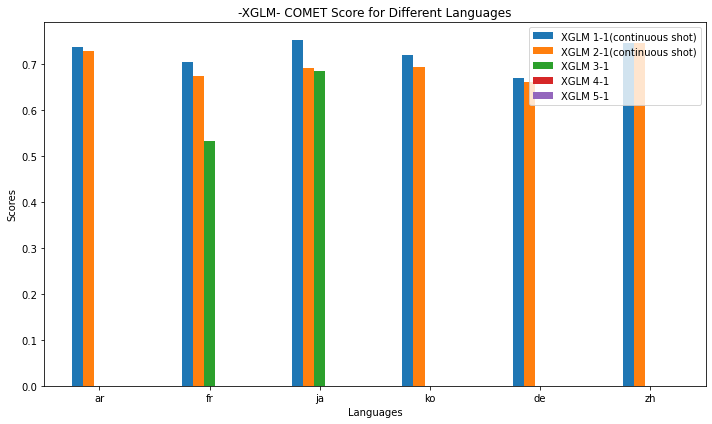

In [45]:
#XGLM 
# Generating positions for the bars
x = np.arange(len(lang_list))  # The label locations
width = 0.1  # The width of the bars

fig, ax = plt.subplots(figsize=(10, len(lang_list)))
rects1 = ax.bar(x - width*2, xglm_comet_list, width, label='XGLM 1-1(continuous shot)') # Ja, FR is not continuous shot anymore
rects2 = ax.bar(x - width, xglm_comet_list_2, width, label='XGLM 2-1(continuous shot)')
rects5 = ax.bar(x, xglm_comet_list_3, width, label='XGLM 3-1')
rects6= ax.bar(x + width, xglm_comet_list_4, width, label='XGLM 4-1')
rects7 = ax.bar(x + width*2, xglm_comet_list_5, width, label='XGLM 5-1')

# Adding labels and title
ax.set_xlabel('Languages')
ax.set_ylabel('Scores')
ax.set_title('-XGLM- COMET Score for Different Languages')
ax.set_xticks(x)
ax.set_xticklabels(lang_list)
ax.legend()

# Adjust the x-axis limits for better visualization
ax.set_xlim(-0.5, len(lang_list) - 0.5)

# Displaying the plot
plt.tight_layout()
plt.show()


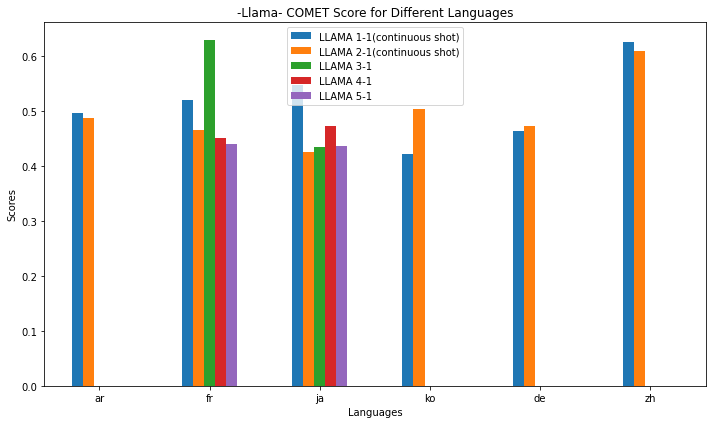

In [46]:
# Generating positions for the bars
x = np.arange(len(lang_list))  # The label locations
width = 0.1  # The width of the bars

# Creating the plot
fig, ax = plt.subplots(figsize=(10, len(lang_list)))
rects3 = ax.bar(x -width*2, llama_comet_list, width, label='LLAMA 1-1(continuous shot)')
rects4 = ax.bar(x-width, llama_comet_list_2, width, label='LLAMA 2-1(continuous shot)')
rects5 = ax.bar(x, llama_comet_list_3, width, label='LLAMA 3-1')
rects6= ax.bar(x + width, llama_comet_list_4, width, label='LLAMA 4-1')
rects7 = ax.bar(x + width*2, llama_comet_list_5, width, label='LLAMA 5-1')


# Adding labels and title
ax.set_xlabel('Languages')
ax.set_ylabel('Scores')
ax.set_title('-Llama- COMET Score for Different Languages')
ax.set_xticks(x)
ax.set_xticklabels(lang_list)
ax.legend()

# Adjust the x-axis limits for better visualization
ax.set_xlim(-0.5, len(lang_list) - 0.5)

# Displaying the plot
plt.tight_layout()
plt.show()


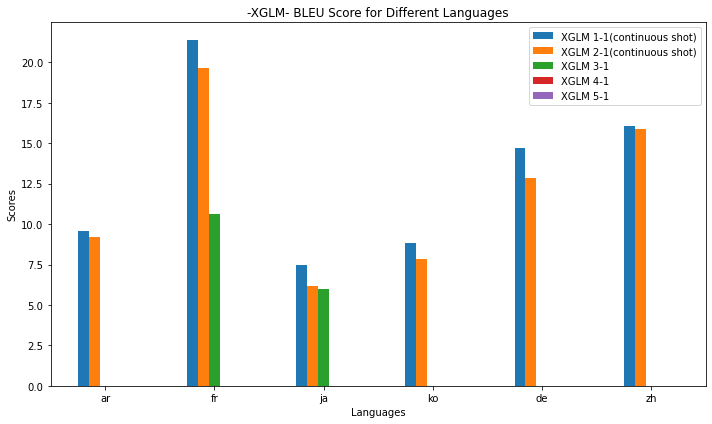

In [47]:
#XGLM 
# Generating positions for the bars
x = np.arange(len(lang_list))  # The label locations
width = 0.1  # The width of the bars

fig, ax = plt.subplots(figsize=(10, len(lang_list)))
rects1 = ax.bar(x - width*2, xglm_bleu_list, width, label='XGLM 1-1(continuous shot)')
rects2 = ax.bar(x - width, xglm_bleu_list_2, width, label='XGLM 2-1(continuous shot)')
rects5 = ax.bar(x, xglm_bleu_list_3, width, label='XGLM 3-1')
rects6= ax.bar(x + width, xglm_bleu_list_4, width, label='XGLM 4-1')
rects7 = ax.bar(x + width*2, xglm_bleu_list_5, width, label='XGLM 5-1')

# Adding labels and title
ax.set_xlabel('Languages')
ax.set_ylabel('Scores')
ax.set_title('-XGLM- BLEU Score for Different Languages')
ax.set_xticks(x)
ax.set_xticklabels(lang_list)
ax.legend()

# Adjust the x-axis limits for better visualization
ax.set_xlim(-0.5, len(lang_list) - 0.5)

# Displaying the plot
plt.tight_layout()
plt.show()


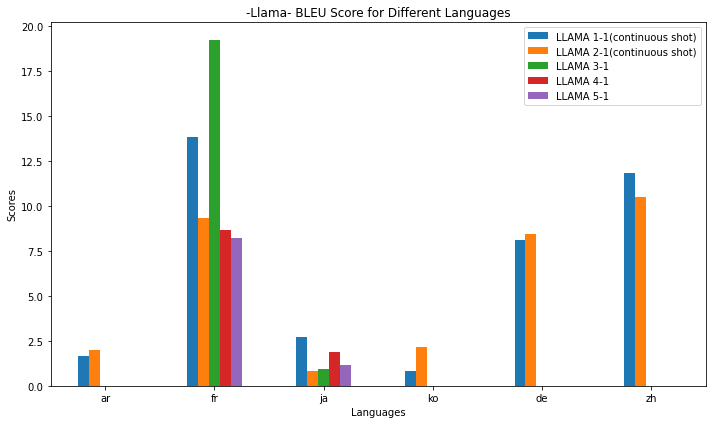

In [48]:
# Generating positions for the bars
x = np.arange(len(lang_list))  # The label locations
width = 0.1  # The width of the bars

# Creating the plot
fig, ax = plt.subplots(figsize=(10, len(lang_list)))
rects3 = ax.bar(x -width*2, llama_bleu_list, width, label='LLAMA 1-1(continuous shot)')
rects4 = ax.bar(x-width, llama_bleu_list_2, width, label='LLAMA 2-1(continuous shot)')
rects5 = ax.bar(x, llama_bleu_list_3, width, label='LLAMA 3-1')
rects6= ax.bar(x + width, llama_bleu_list_4, width, label='LLAMA 4-1')
rects7 = ax.bar(x + width*2, llama_bleu_list_5, width, label='LLAMA 5-1')


# Adding labels and title
ax.set_xlabel('Languages')
ax.set_ylabel('Scores')
ax.set_title('-Llama- BLEU Score for Different Languages')
ax.set_xticks(x)
ax.set_xticklabels(lang_list)
ax.legend()

# Adjust the x-axis limits for better visualization
ax.set_xlim(-0.5, len(lang_list) - 0.5)

# Displaying the plot
plt.tight_layout()
plt.show()
